In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Dataset Link
https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset?resource=download

## Data Preprocessing


### Training image preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '../dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation image preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '../dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

## Building the model

In [9]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

## Building the convolution layer

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
# Output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling the model

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [24]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 782s 356ms/step - accuracy: 0.7959 - loss: 0.6872 - val_accuracy: 0.8733 - val_loss: 0.4036
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 850s 387ms/step - accuracy: 0.8678 - loss: 0.4468 - val_accuracy: 0.8783 - val_loss: 0.4070
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 819s 373ms/step - accuracy: 0.9035 - loss: 0.3368 - val_accuracy: 0.9280 - val_loss: 0.2524
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 634s 289ms/step - accuracy: 0.9214 - loss: 0.2825 - val_accuracy: 0.9234 - val_loss: 0.2940
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4542s 2s/step - accuracy: 0.9357 - loss: 0.2362 - val_accuracy: 0.9446 - val_loss: 0.2186
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3749s 2s/step - accuracy: 0.9471 - loss: 0.1947 - val_accuracy: 0.9466 - val_loss: 0.2359
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1104s 503ms/step - accuracy: 0.9546 - loss: 0.1677 - val_accuracy: 0.9550 - val_loss: 0.1750
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 695s 316ms/step - accur

## Model evaluation

In [25]:
# Model evaluation on training set
train_loss,train_accuracy = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 115s 52ms/step - accuracy: 0.9907 - loss: 0.0326


In [26]:
print(train_loss,train_accuracy)

0.03262113779783249 0.9906821250915527


In [27]:
# Model evaluation on validation set
val_loss,val_accuracy = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.9672 - loss: 0.1386


In [28]:
print(val_loss,val_accuracy)

0.13863657414913177 0.9672206044197083


## Saving the model

In [29]:
model.save("trained_model.h5")

In [30]:
training_history.history

{'accuracy': [0.7959314584732056,
  0.8677857518196106,
  0.9034924507141113,
  0.9213599562644958,
  0.9356995224952698,
  0.947080135345459,
  0.9545629024505615,
  0.9599402546882629,
  0.9633117318153381,
  0.9681200385093689],
 'loss': [0.6872291564941406,
  0.4468430280685425,
  0.3368253707885742,
  0.2824874520301819,
  0.23615050315856934,
  0.19470536708831787,
  0.16772855818271637,
  0.1548381894826889,
  0.1476871371269226,
  0.1292247474193573],
 'val_accuracy': [0.8733211755752563,
  0.8783291578292847,
  0.9280104637145996,
  0.92340087890625,
  0.9445708990097046,
  0.9466196298599243,
  0.9549852013587952,
  0.9461643695831299,
  0.9601069688796997,
  0.9672206044197083],
 'val_loss': [0.40357282757759094,
  0.40696921944618225,
  0.2524213194847107,
  0.29398441314697266,
  0.2186276763677597,
  0.23589764535427094,
  0.17501449584960938,
  0.2609426975250244,
  0.17743749916553497,
  0.1386365294456482]}

In [32]:
# Recording the history in JSON format
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy visualization

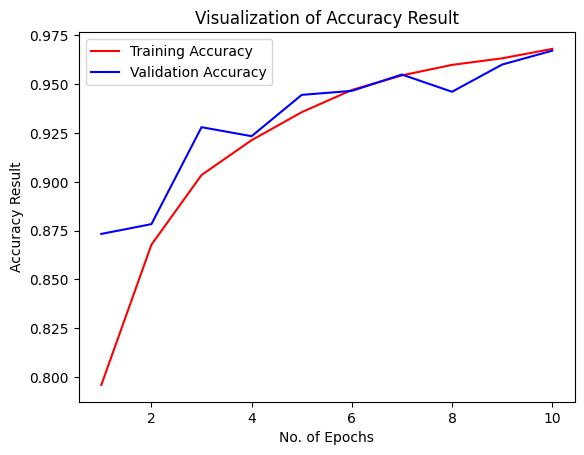

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [44]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '../dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step


(array([[1.0000000e+00, 1.1504752e-11, 1.1678258e-15, ..., 5.1157081e-24,
         4.6916068e-25, 1.5589337e-19],
        [9.9993920e-01, 3.8227812e-05, 1.1602925e-08, ..., 8.4728208e-16,
         6.9694164e-13, 3.6957487e-10],
        [1.0000000e+00, 7.6572020e-11, 4.2588047e-14, ..., 1.1270746e-22,
         3.6405181e-22, 4.9485038e-18],
        ...,
        [2.8465298e-15, 5.6259842e-19, 4.0454362e-10, ..., 6.6826156e-15,
         1.0781841e-17, 1.0000000e+00],
        [8.5607984e-16, 1.5785466e-23, 1.3539223e-14, ..., 1.1996441e-17,
         1.5545036e-19, 1.0000000e+00],
        [1.3618524e-37, 0.0000000e+00, 1.8904313e-33, ..., 5.2182267e-36,
         1.4844940e-28, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [37]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [38]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

2025-10-09 13:24:28.407097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.93      0.96       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.99      0.97       440
                                   Apple___healthy       0.96      0.97      0.96       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.94      0.95       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

In [42]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

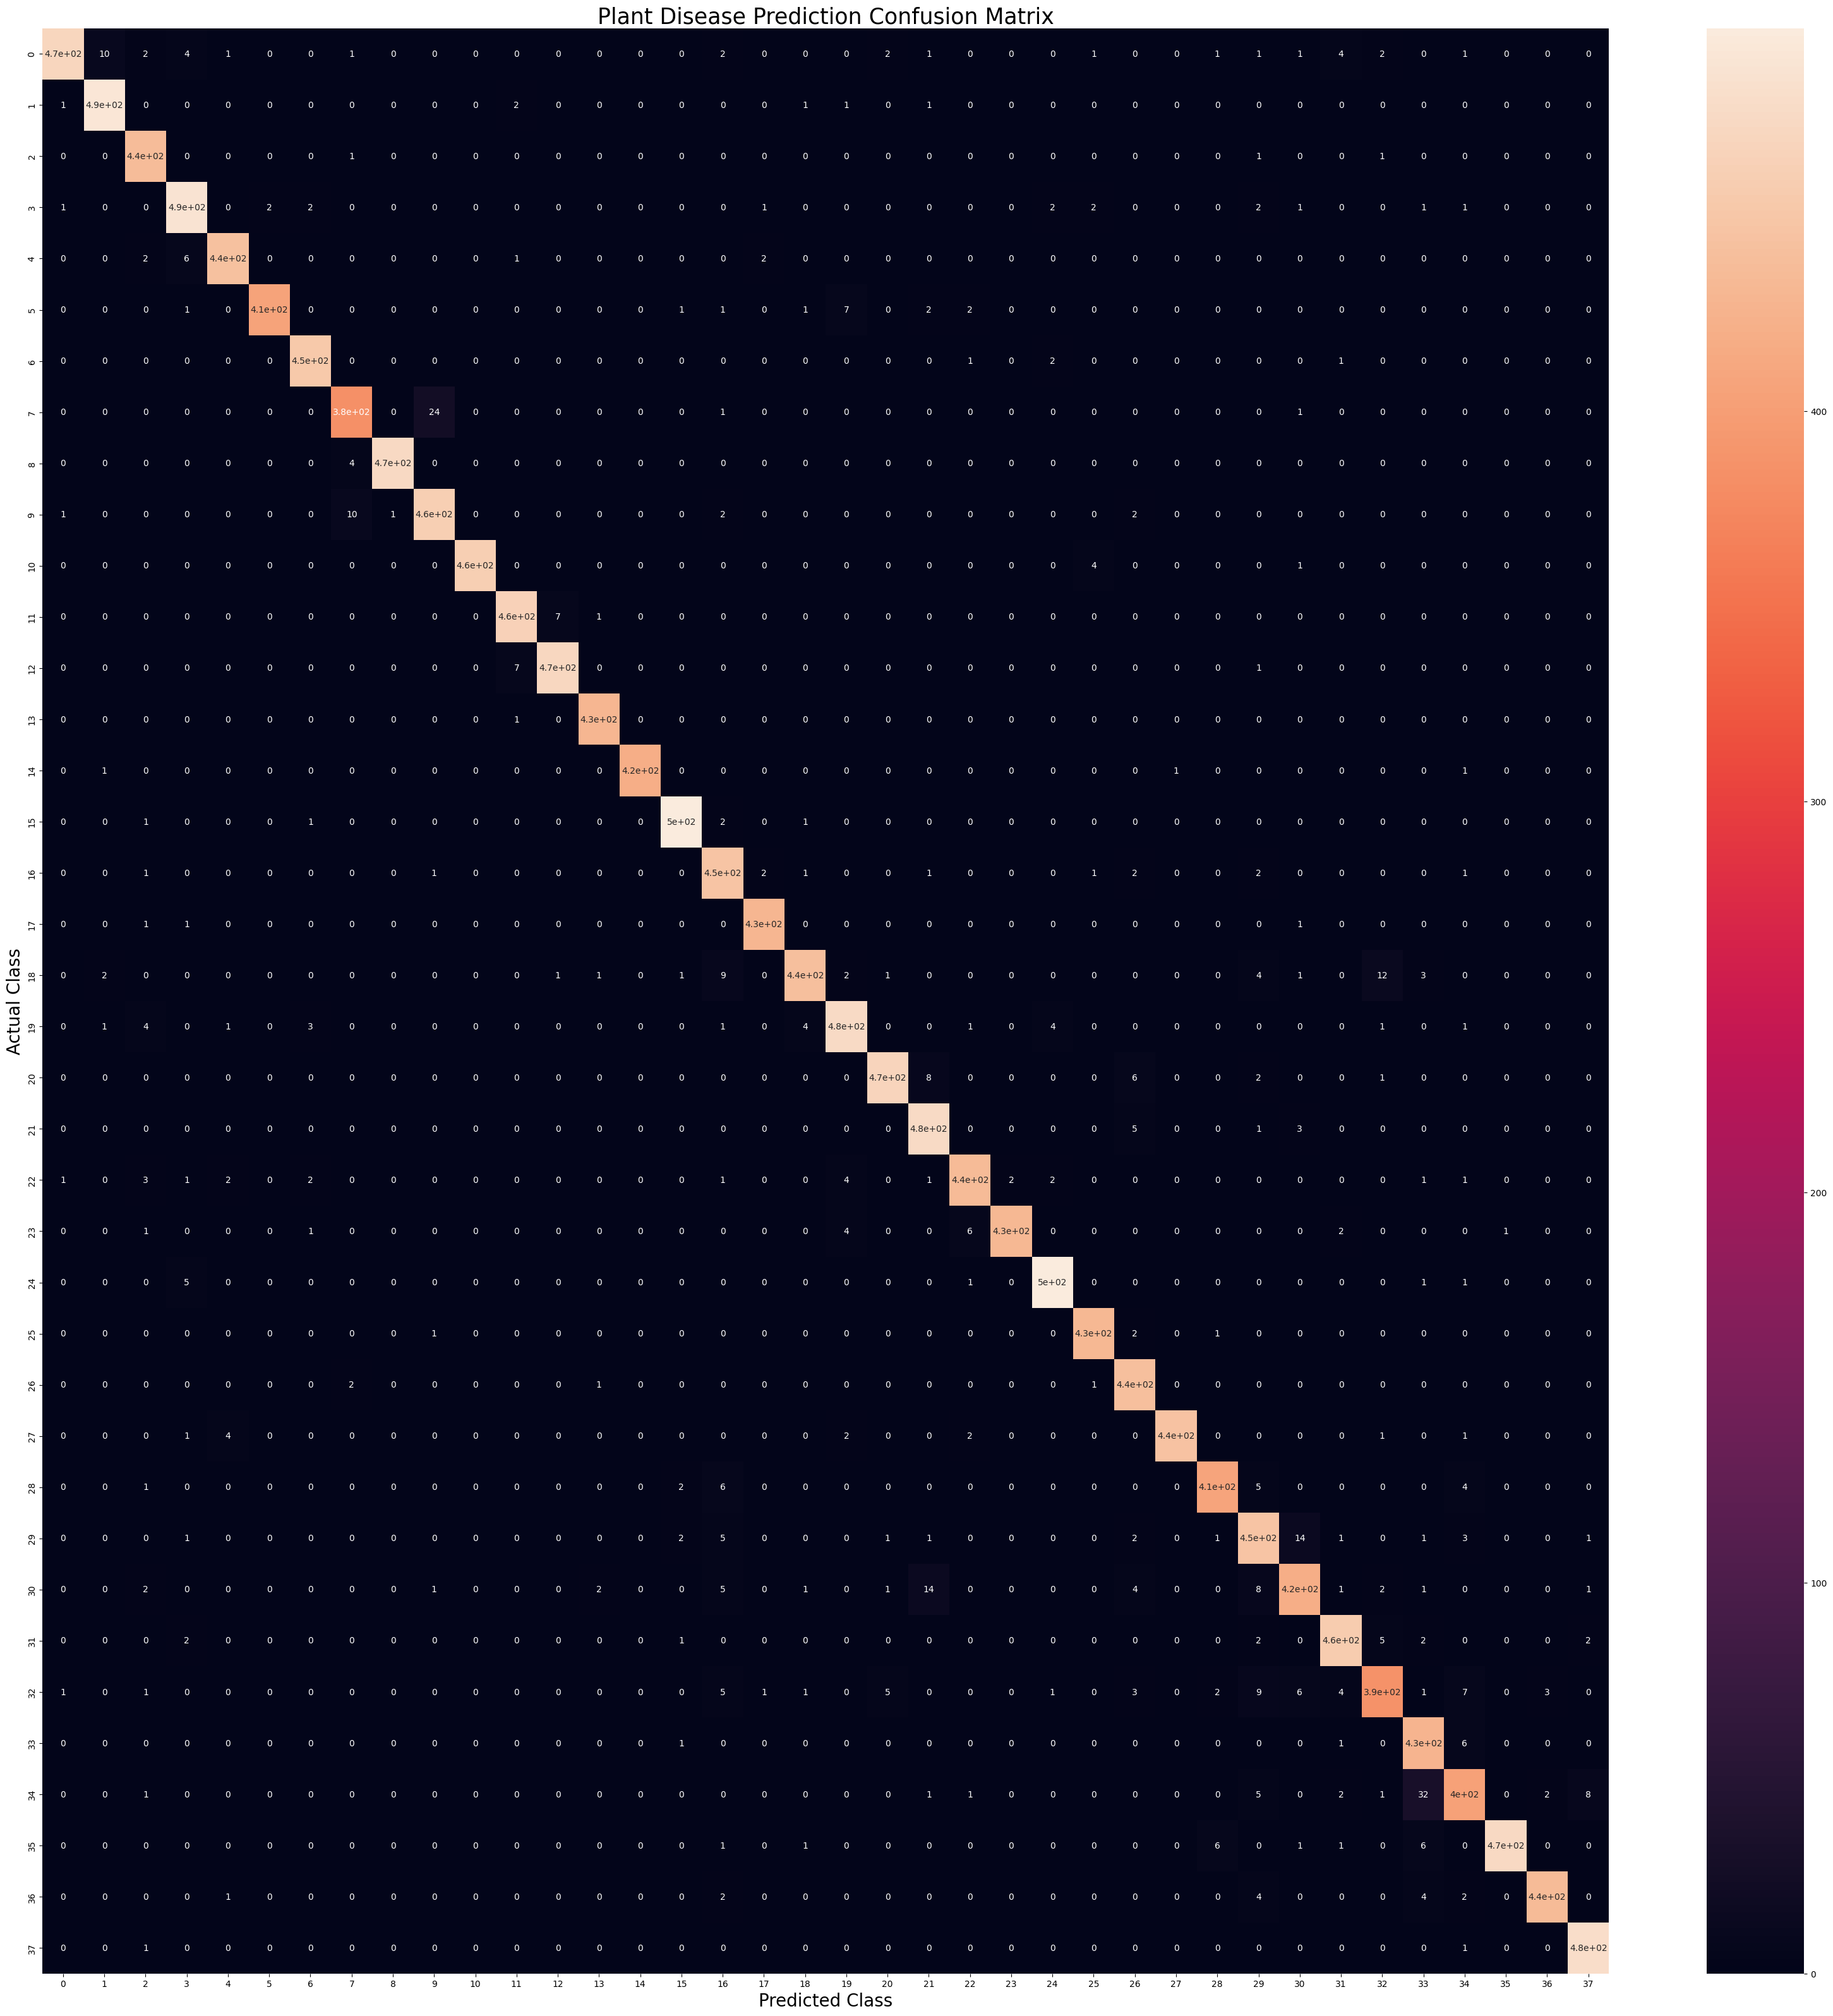

In [43]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()